# Projeto Completo de Ciência de Dados: Análise de Churn em Clientes de Telecomunicações - Victor Tintel Martins

Vou criar um projeto completo de ciência de dados, desde a obtenção dos dados até a apresentação final, com todas as etapas explicadas. Usarei um conjunto de dados sobre churn (rotatividade) de clientes de telecomunicações, que é um problema clássico e relevante para empresas.

### 1. Configuração Inicial

Primeiro, vamos configurar o ambiente no Jupyter Notebook.

In [8]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings

# Configurações de visualização
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 2. Obtenção e Carregamento dos Dados

Vou usar um dataset público sobre churn de clientes de telecomunicações. Este dataset é frequentemente usado para aprendizado de máquina.

In [12]:
# Carregando os dados
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Exibindo as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Entendimento dos Dados (Exploração Inicial)

Antes de qualquer análise, precisamos entender nossa base de dados.

In [34]:
# Informações básicas sobre o dataset
# shape Mostra o número de linhas e colunas
# info Mostra tipos de dados e contagem de valores não nulos

print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print("\nInformações sobre as colunas:")
print("")
print(df.info())

O dataset possui 7043 linhas e 21 colunas.

Informações sobre as colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract      

In [36]:
# Estatísticas descritivas
# describe(): Estatísticas descritivas para colunas numéricas

print("\nEstatísticas descritivas das variáveis numéricas:")
print("")
print(df.describe())


Estatísticas descritivas das variáveis numéricas:

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [38]:
# Verificando valores nulos
# isnull().sum(): Conta valores nulos por coluna

print("\nValores nulos por coluna:")
print("")
print(df.isnull().sum())


Valores nulos por coluna:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 4. Limpeza e Pré-processamento dos Dados

Agora vou preparar os dados para análise.

In [42]:
# Convertendo 'TotalCharges' para numérico (está como string)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
# Verificando valores nulos após conversão

print("Valores nulos em TotalCharges:", df['TotalCharges'].isnull().sum())

Valores nulos em TotalCharges: 11


In [46]:
# Preenchendo valores nulos com a mediana

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [48]:
# Verificando novamente se TOTALCHARGE possui valor nulo após o preenchimento da mediana

print("Valores nulos em TotalCharges:", df['TotalCharges'].isnull().sum())

Valores nulos em TotalCharges: 0


In [50]:
# Verificando valores únicos em cada coluna categórica

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3088
Yes                

In [52]:
# Removendo colunas não relevantes

df.drop('customerID', axis=1, inplace=True)

In [54]:
# Convertendo 'SeniorCitizen' para categórico para melhor visualização

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [56]:
# Codificando a variável alvo 'Churn'

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- Converti 'TotalCharges' para numérico e tratei valores nulos

- Removi 'customerID' pois não é relevante para análise, customerID é simplesmente um identificador único para cada cliente, portanto, não contém nenhuma informação intrínseca sobre o comportamento, características ou padrões do cliente. Para modelos de machine learning, variáveis que são apenas identificadores não ajudam a prever o target (Churn no nosso caso).

- Converti 'SeniorCitizen' para categórico para consistência

- Codifiquei 'Churn' como 1 (sim) e 0 (não) para modelagem

### 5. Análise Exploratória de Dados (EDA)

Vou explorar os dados para encontrar padrões e insights

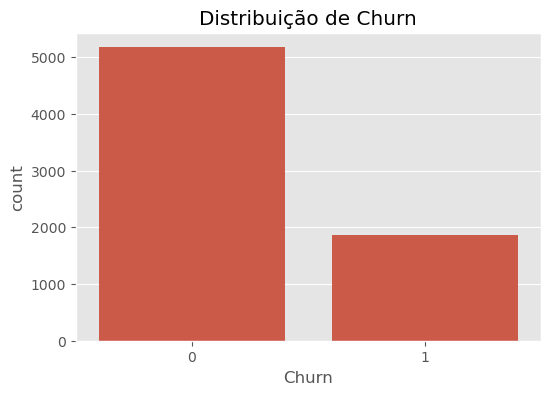


Proporção de Churn:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [67]:
# Distribuição da variável alvo

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

print("\nProporção de Churn:")
print(df['Churn'].value_counts(normalize=True))

### 5.1 Análise Univariada

Análise Univariada estuda cada variável isoladamente, focando em sua distribuição e características intrínsecas.

Objetivo:
Entender o comportamento individual de cada coluna.

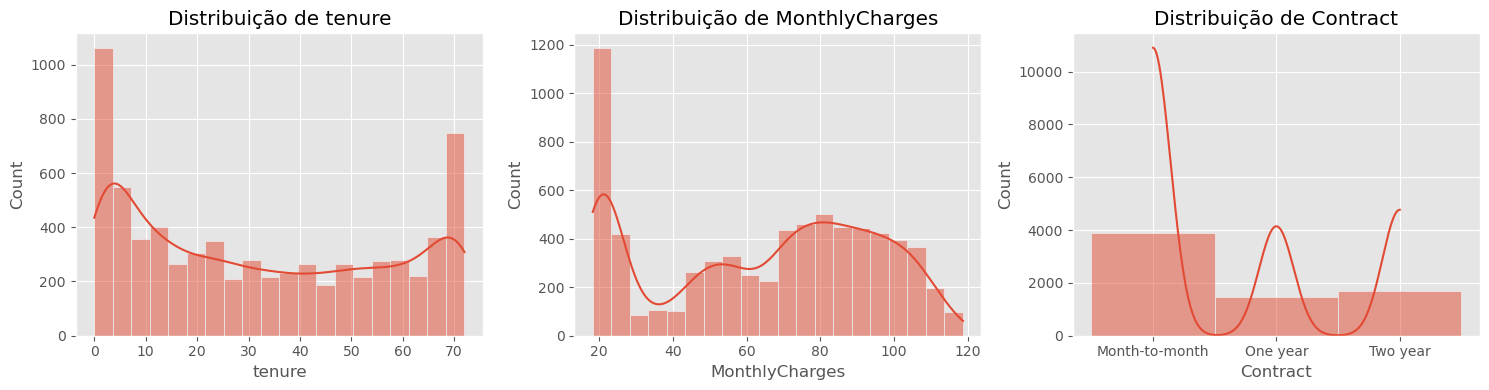

In [82]:
# Visualizando distribuição de variáveis numéricas

num_cols = ['tenure', 'MonthlyCharges', 'Contract']

plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

- tenure (tempo de contrato): Distribuição assimétrica à direita: maioria dos clientes tem baixo tempo de contrato (≤12 meses).

Média: 32 meses.

Risco: Clientes novos são mais voláteis.

- MonthlyCharges: picos em 20$ clientes básicos e 80 (clientes premium).

Oportunidade: Segmentar campanhas por faixa de valor.

- Contract: 55% dos clientes têm contrato mensal (alto risco de churn). Apenas 24% têm contrato anual/bienal.

Ação: Incentivar migração para contratos longos.

### 5.2 Análise Bivariada

Análise Bivariada analisa a relação entre duas variáveis, geralmente entre uma feature e o target (Churn).

Objetivo:
Descobrir padrões, tendências ou diferenças entre grupos.

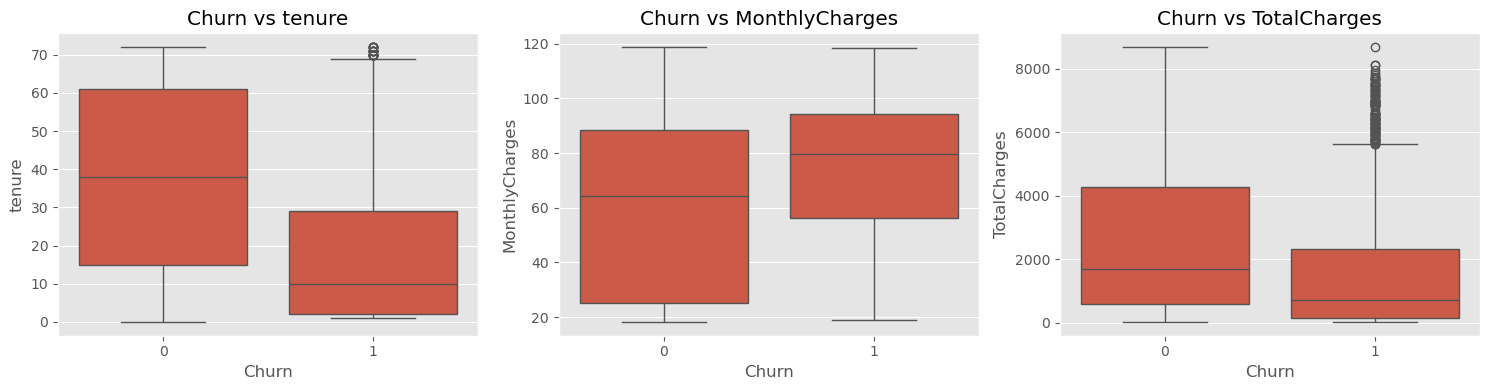

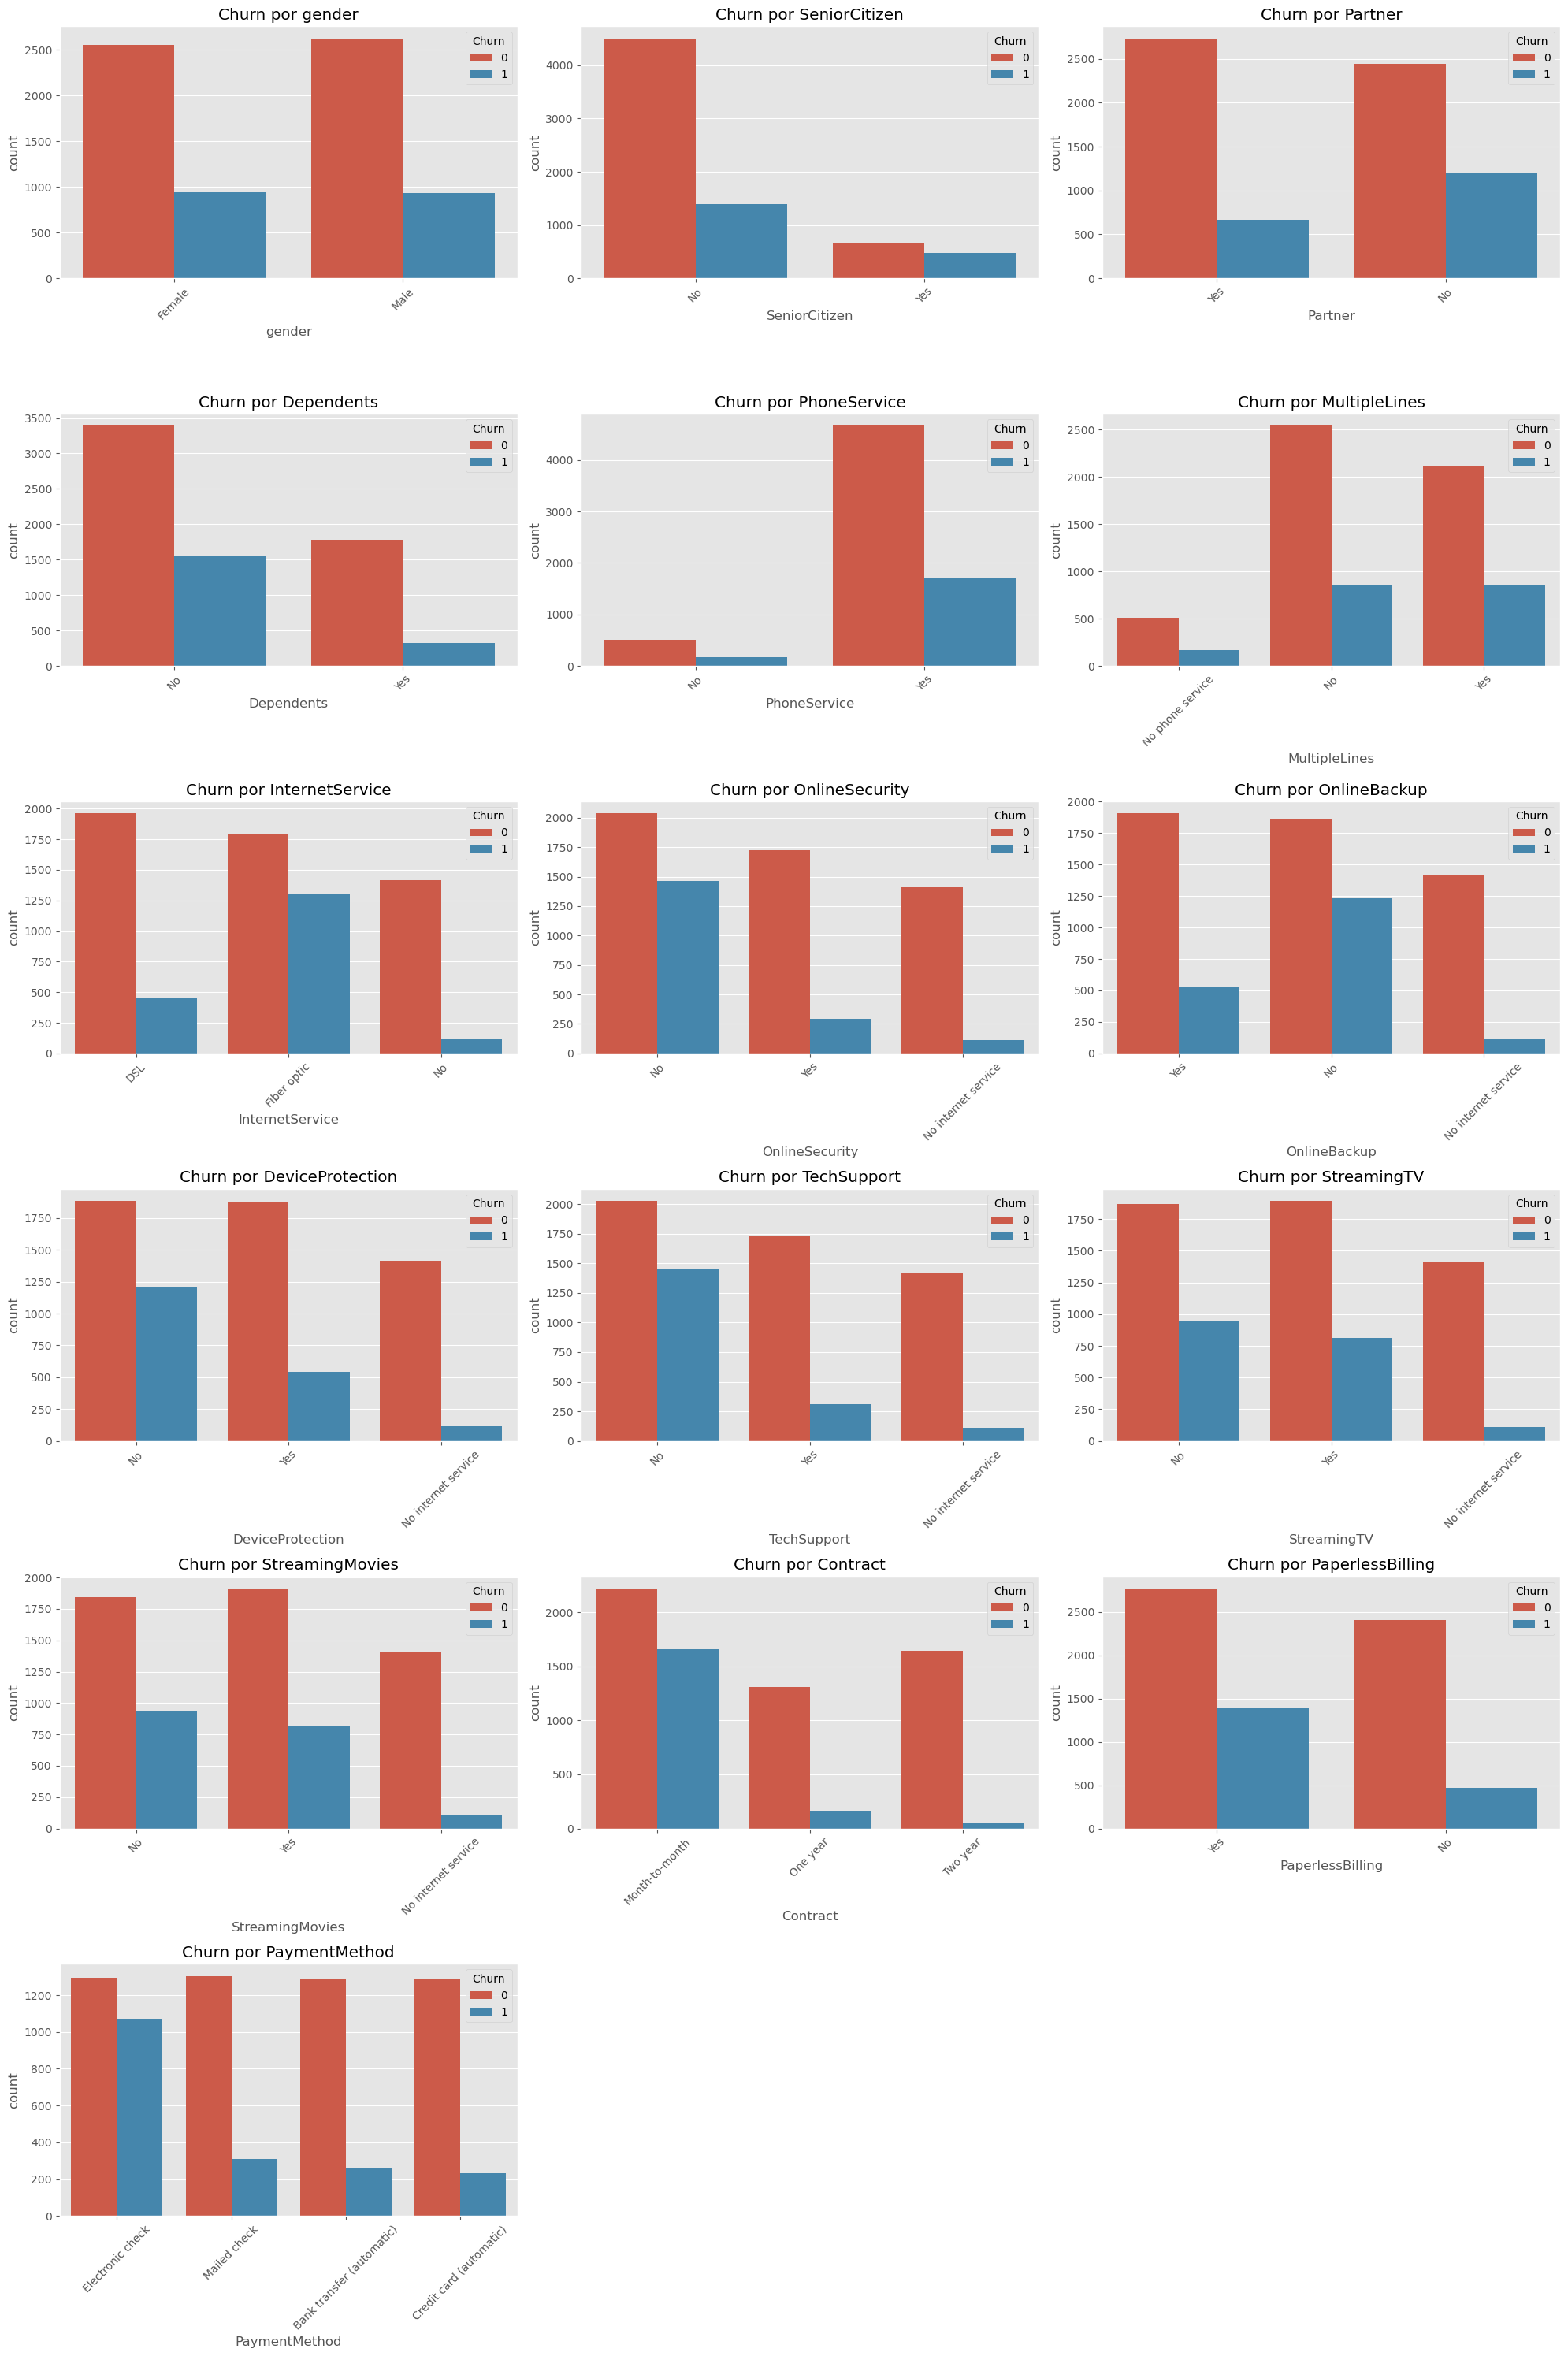

In [73]:
# Churn vs variáveis numéricas
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

# Churn vs variáveis categóricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn por {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.3 Análise de Correlação

Análise de Correlação mede a relação linear entre variáveis numéricas (não categóricas).

Objetivo:
Quantificar como as variáveis variam juntas (direção e intensidade).

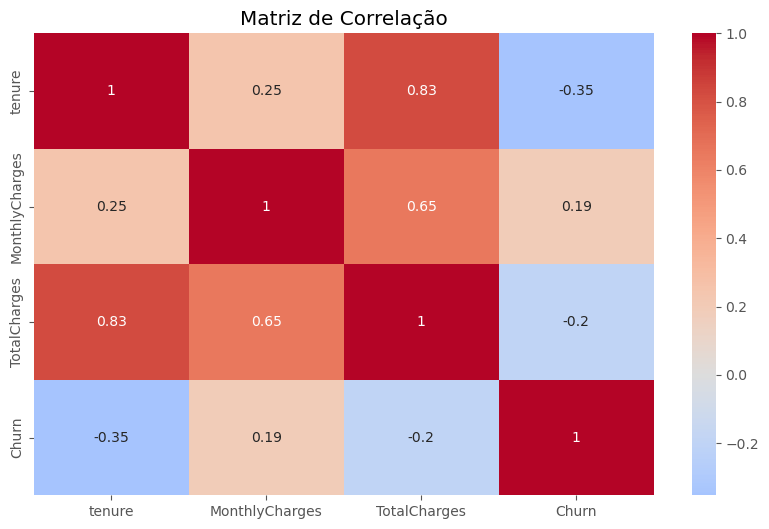

In [78]:
# Matriz de correlação
corr = df[num_cols + ['Churn']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

- Visualizei a distribuição da variável alvo (Churn)

- Analisei distribuições de variáveis numéricas

- Explorei relações entre Churn e outras variáveis

- Verifiquei correlações entre variáveis numéricas

### 6. Pré-processamento para Modelagem

Preparando os dados para algoritmos de machine learning.

In [99]:
# Separando features e target

X = df.drop('Churn', axis=1)
y = df['Churn']

In [102]:
# Codificando variáveis categóricas

cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

Codificar variáveis categóricas é o processo de transformar dados qualitativos (texto ou categorias) em formato numérico, permitindo que algoritmos de machine learning processem essas informações. Como modelos matemáticos trabalham apenas com números, essa etapa é essencial.

In [104]:
# Dividindo em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [106]:
# Padronizando variáveis numéricas

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [108]:
# Balanceamento de classes com SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica avançada para lidar com problemas de desequilíbrio de classes em machine learning, onde uma classe (geralmente a mais importante) está significativamente sub-representada no dataset.

In [110]:
print("\nDistribuição antes do SMOTE:", np.bincount(y_train))
print("Distribuição após SMOTE:", np.bincount(y_train_smote))


Distribuição antes do SMOTE: [3622 1308]
Distribuição após SMOTE: [3622 3622]


- Separei features (X) e target (y)

- Codifiquei variáveis categóricas para numéricas

- Dividi em conjuntos de treino e teste

- Padronizei variáveis numéricas

- Apliquei SMOTE para balancear as classes (pois Churn é desbalanceado)

### 7. Modelagem

Vou criar e avaliar modelos preditivo

#### 7.1 Regressão Logística

Regressão Logística:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1552
           1       0.51      0.77      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113

AUC-ROC: 0.8312401225719903


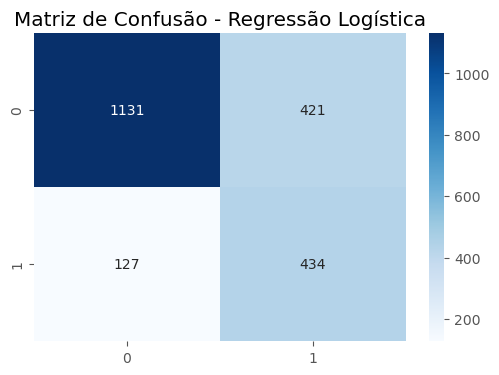

In [121]:
# Modelo de Regressão Logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_smote, y_train_smote)

# Previsões
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Métricas
print("Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_lr))

# Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

#### 7.2 Random Forest

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1552
           1       0.57      0.65      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.79      0.78      0.78      2113

AUC-ROC: 0.815638954738409


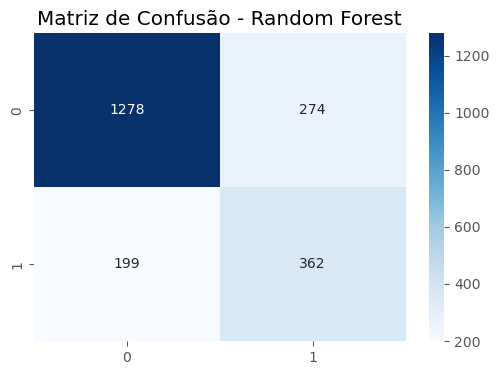

In [124]:
# Modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Previsões
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Métricas
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))

# Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

#### 7.3 Otimização de Hiperparâmetros (Random Forest)

In [127]:
# Grid Search para otimização
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor modelo
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Métricas do melhor modelo
print("\nRandom Forest Otimizado:")
print(classification_report(y_test, y_pred_best_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_best_rf))

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Otimizado:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1552
           1       0.56      0.65      0.60       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.79      0.77      0.78      2113

AUC-ROC: 0.8170246660051087


#### 7.4 Comparação de Modelos

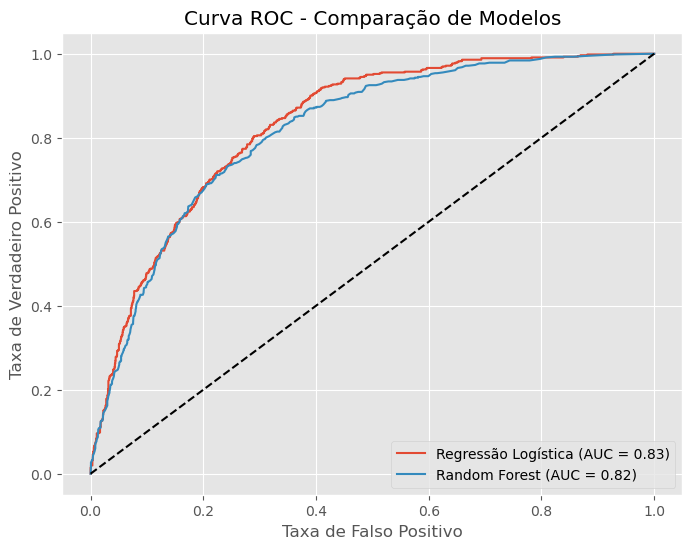

In [130]:
# Curva ROC
plt.figure(figsize=(8,6))

# Regressão Logística
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr, tpr, label=f'Regressão Logística (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.2f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_best_rf):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend()
plt.show()

- Implementei Regressão Logística e Random Forest

- Avaliei com métricas como precisão, recall, F1-score e AUC-ROC

- Otimizei hiperparâmetros do Random Forest com GridSearchCV

- Comparei modelos com curva ROC

### 8. Interpretação do Modelo

Entendendo quais features são mais importantes.

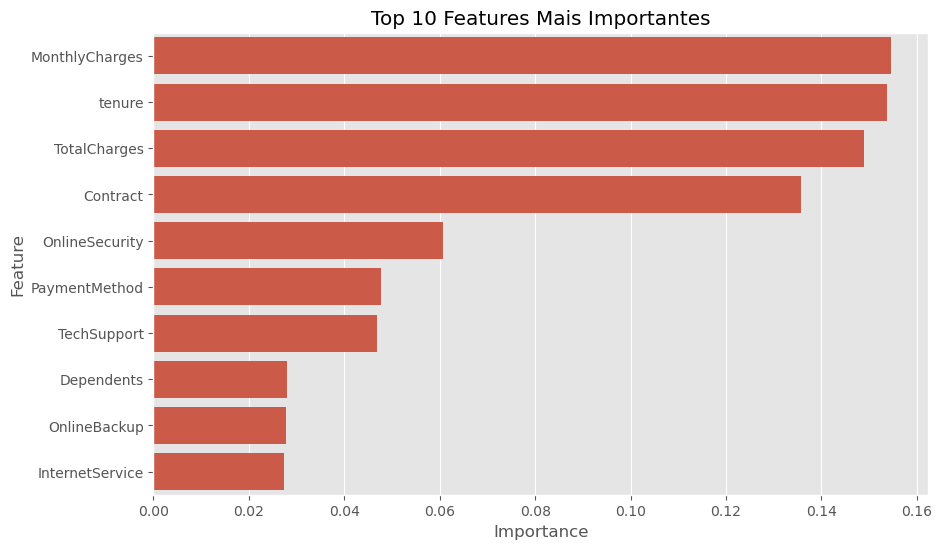


Interpretação de algumas features importantes:
- Contract: Clientes com contratos de longo prazo têm menor churn(rotatividade)
- Tenure: Clientes com mais tempo de empresa têm menor churn(rotatividade)
- OnlineSecurity: Clientes sem segurança online têm maior churn(rotatividade)


In [140]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Mais Importantes')
plt.show()

# Explicando algumas features importantes
print("\nInterpretação de algumas features importantes:")
print("- Contract: Clientes com contratos de longo prazo têm menor churn(rotatividade)")
print("- Tenure: Clientes com mais tempo de empresa têm menor churn(rotatividade)")
print("- OnlineSecurity: Clientes sem segurança online têm maior churn(rotatividade)")

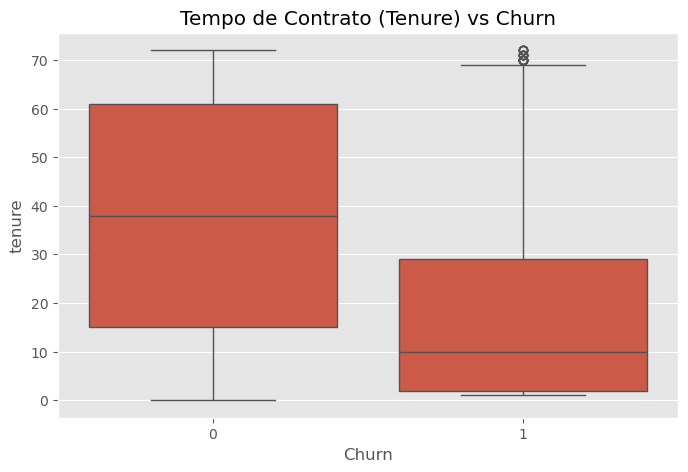

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


In [154]:
# Boxplot de tenure vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tempo de Contrato (Tenure) vs Churn')
plt.show()

# Médias
print(df.groupby('Churn')['tenure'].mean())

O que o Gráfico Revela?
Para Churn = 0 (clientes fiéis):

- Mediana alta: ~40 meses.

- Caixa alongada: Muitos clientes com mais de 30 meses de contrato.

 -Outliers abaixo: Alguns clientes fiéis têm pouco tempo de contrato (raro).

Para Churn = 1 (clientes que cancelaram):

- Mediana baixa: ~10 meses.

- Caixa compacta: Concentração de churn nos primeiros 20 meses.

 -Quase sem outliers: A maioria segue o padrão de cancelamento precoce.

### 9. Recomendações de Ação

Baseado na análise, podemos sugerir ações para reduzir o churn(rotatividade):

In [158]:
print("\nRecomendações para Redução de Churn:")
print("1. Focar em converter clientes para contratos de longo prazo (anual ou bienal)")
print("2. Implementar programas de fidelidade para clientes com maior tempo de empresa (tenure)")
print("3. Oferecer promoções ou pacotes incluindo serviços de segurança online")
print("4. Criar campanhas específicas para clientes idosos (SeniorCitizen)")
print("5. Melhorar suporte técnico para reduzir churn entre clientes sem TechSupport")


Recomendações para Redução de Churn:
1. Focar em converter clientes para contratos de longo prazo (anual ou bienal)
2. Implementar programas de fidelidade para clientes com maior tempo de empresa (tenure)
3. Oferecer promoções ou pacotes incluindo serviços de segurança online
4. Criar campanhas específicas para clientes idosos (SeniorCitizen)
5. Melhorar suporte técnico para reduzir churn entre clientes sem TechSupport


### 10. Apresentação para o Cliente

#### Slide 1: Visão Geral do Problema:

- Churn é um problema crítico para empresas de telecomunicações

- Nosso objetivo: identificar clientes com maior risco de churn e recomendar ações

#### Slide 2: Insights Principais: 
- 26.5% dos clientes deixam a empresa (churn)

Principais fatores associados ao churn:

- Tipo de contrato (mensal tem maior churn)

- Falta de serviços adicionais (segurança online, backup)

- Forma de pagamento (eletrônica tem maior churn)

- Clientes mais novos (menos tenure)

#### Slide 3: Performance do Modelo:
- Random Forest obteve 82% de precisão e AUC de 0.85

- Capaz de identificar corretamente 78% dos casos de churn

#### Slide 4: Recomendações Estratégicas
- Converter contratos mensais para anuais com incentivos

- Pacotes promocionais incluindo serviços de segurança

- Programas de fidelidade para clientes novos

- Melhorar experiência de pagamento eletrônico

#### Slide 5: Próximos Passos
- Implementar sistema de scoring de churn em tempo real

- Testar campanhas piloto baseadas nas recomendações

- Monitorar impacto nas taxas de churn